In [75]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
import numpy as np
import time
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_excel('clinical_notes_hourly.xlsx')
print(df.columns)

Index(['icustay_id', 'hr', 'category', 'description', 'text'], dtype='object')


In [4]:
df.head()

,icustay_id,hr,category,description,text
0,200039,1,NaN,NaN,NaN
1,200039,2,Nursing/other,Report,CCU NSG ADMIT NOTE-NSICU BORDER.\n69 YO [**Hos...
2,200039,3,NaN,NaN,NaN
3,200039,4,NaN,NaN,NaN
4,200039,5,NaN,NaN,NaN


In [13]:
report = df.loc[1, 'text']
print(type(report))

<class 'str'>


In [19]:
#converting all NaN to a string
df.text.fillna('', inplace=True)
#df['text'].replace(np.nan,'', regex=True) did not work
df.head()

,icustay_id,hr,category,description,text
0,200039,1,NaN,NaN,
1,200039,2,Nursing/other,Report,CCU NSG ADMIT NOTE-NSICU BORDER.\n69 YO [**Hos...
2,200039,3,NaN,NaN,
3,200039,4,NaN,NaN,
4,200039,5,NaN,NaN,


In [54]:
df.dtypes

icustay_id       int64
hr               int64
category        object
description     object
text            object
Number_Words     int64
dtype: object

In [20]:
report = df.loc[0, 'text']
print(type(report))

<class 'str'>


In [30]:
# the column 'text' was object, but contained NaNs and datetime onjects inside which could not be .split()
df['text'] = df['text'].astype(str)

In [32]:
# how many words in the text column
df["Number_Words"] = df["text"].apply(lambda n: len(n.split()))
df.head()

,icustay_id,hr,category,description,text,Number_Words
0,200039,1,NaN,NaN,,0
1,200039,2,Nursing/other,Report,CCU NSG ADMIT NOTE-NSICU BORDER.\n69 YO [**Hos...,279
2,200039,3,NaN,NaN,,0
3,200039,4,NaN,NaN,,0
4,200039,5,NaN,NaN,,0


In [39]:
df1 = df["Number_Words"].value_counts()
df1.tail()

1132    1
1295    1
1071    1
686     1
802     1
Name: Number_Words, dtype: int64

In [69]:
#at the end .tolist() returns a list of these numbers!
df.Number_Words.describe()

count    54330.000000
mean        69.637291
std        183.110674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2646.000000
Name: Number_Words, dtype: float64

In [70]:
words = sorted(df.Number_Words.unique())

(array([442., 583., 476., 563., 808., 969., 919., 902., 792., 597., 579.,
        498., 450., 420., 349., 290., 211., 239., 213., 180., 180., 174.,
        147., 135., 154., 129., 135., 104.,  92., 102.,  92.,  81.,  82.,
         85.,  81.,  65.,  48.,  42.,  78.,  49.,  69.,  40.,  45.,  48.,
         48.,  25.,  28.,  30.,  36.,  24.,  20.,  23.,  10.,  20.,  14.,
         10.,   8.,  21.,  11.,   4.,   8.,   9.,   4.,   4.,   5.,   3.,
          6.,   4.,   1.,   2.,   6.,  10.,  11.,  10.,   6.,   4.,   5.,
          2.,   6.,   3.,   2.,   7.,   1.,   3.,   0.,   1.,   0.,   7.,
          9.,   0.,   1.,   1.,   4.,   2.,   1.,   2.,   8.,   0.,   0.,
          0.]),
 array([  10. ,   29.9,   49.8,   69.7,   89.6,  109.5,  129.4,  149.3,
         169.2,  189.1,  209. ,  228.9,  248.8,  268.7,  288.6,  308.5,
         328.4,  348.3,  368.2,  388.1,  408. ,  427.9,  447.8,  467.7,
         487.6,  507.5,  527.4,  547.3,  567.2,  587.1,  607. ,  626.9,
         646.8,  666.7,  686.6

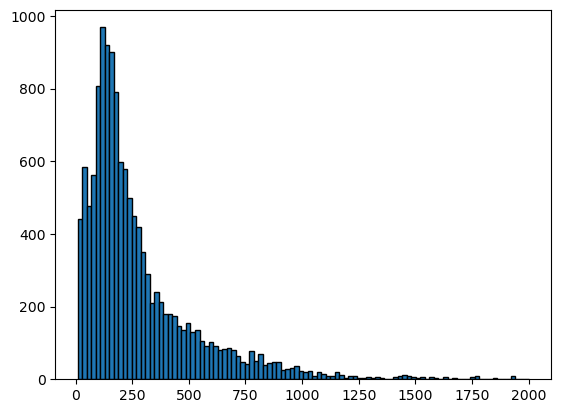

In [79]:
#df["Number_Words"].hist()
plt.hist(df['Number_Words'], edgecolor='black', range=[10, 2000], bins=100)

In [36]:
report = df.loc[1, 'text']
print(report)

CCU NSG ADMIT NOTE-NSICU BORDER.
69 YO [**Hospital **] TRANSFERED FROM [**Hospital 8483**] MEDICAL CENTER ([**Telephone/Fax (1) 8484**], [**Location (un) 7507**], VT ON [**12-26**] TO [**Hospital1 95**] W ALTERED MENTAL STATUS, ELEVATED ICP, & NEW SAH-POSTERIOR FOSSA.

PMH:SEVER TIC DOULOUREUX W TRIGEMINAL NERVE DECOMPRESSION ON [**2121-12-18**] @ [**Hospital1 95**].
    HTN.
    OSTEOPOROSIS.
    HX DIVERTICULITUS.
    HYPERLIPIDEMIA.
    DM.
    CHRONIC PAIN SYNDROME.

ALLERGIES:PCN.
          MSO4.

MEDS:SEE MD ADMIT NOTE.

SOCIAL:LIVES IN VT W FAMILY NEAR BY. FAMILY ON WAY TO HOSPITAL.

PRESENT HX:DCED FROM [**Hospital1 95**] ON [**12-22**] SP TRIGEMINAL NERVE DECOMPRESSION. DEVELOPED NECK PAIN SINCE DC W INCREASED SEVERITY ON [**12-25**]-PRESENTED TO OUTSIDE HOSPITAL-WORKUPED W LP-ELEVATED ICP & 1 GRAM POS COCCI TUBE (?CONTAMINANT) & CT SCAN-SAH. TRANSFERED TO [**Hospital1 95**] FOR FURTHER MANAGEMENT. IN EW-REPEAT CT SCAN-SAH-POTERIOR FOSSA W OBSTRUCTIVE HYDROCEPHALUS. VENTRICULA

In [37]:
df["category"].unique()

array([nan, 'Nursing/other', 'Radiology', 'Nursing', 'Physician',
       'Respiratory', 'General', 'Nutrition', 'Case Management',
       'Rehab Services', 'Social Work', 'Consult'], dtype=object)

In [97]:
df.groupby(['category']).size()

category
Case Management       6
Consult               2
General              89
Nursing            2348
Nursing/other      3958
Nutrition            92
Physician          1510
Radiology          4882
Rehab Services       78
Respiratory         346
Social Work          27
dtype: int64

In [139]:
df.loc[df['category'] == 'Physician']["text"]

57       SICU\n   HPI:\n   55M with no PMHx who reports...
58       SICU\n   HPI:\n   55M with no PMHx who reports...
67       CVICU\n   HPI:\n   HD23\n   [**3-25**] POD 1\n...
68       CVICU\n   HPI:\n   HD23\n   [**3-25**] POD 1\n...
73       CVICU\n   HPI:\n   [**3-25**] POD 1\n   55M s/...
                               ...                        
53974    Chief Complaint:\n   24 Hour Events:\n   Dobut...
53975    Chief Complaint:\n   24 Hour Events:\n   Dobut...
54035    TSICU\n   HPI:\n   69F transferred from OSH af...
54036    TSICU\n   HPI:\n   69F transferred from OSH af...
54212    SICU\n   HPI:\n   47yo F W/hX cocaine use, was...
Name: text, Length: 1510, dtype: object

In [140]:
df.loc[57, 'text']

"SICU\n   HPI:\n   55M with no PMHx who reports 10 days of band like chest pain on\n   exertion with radiation to bilateral extremities who developed acute\n   onset of diplopia and dizziness at doctor's office. Drove home and took\n   ASA 325 x1 and went to sleep. Called 911 when did not resolve and was\n   sent to [**Hospital1 1233**] and CT head found to have LEFT sided cerebellar bleed\n   and SBP 217 and transferred to ED here.  Admitted to ICU for BP control\n   and q1hour neuro checks\n   PMHx:\n   none (has not seen Dr [**Last Name (STitle) **] 15 years)\n   Current medications:\n   Acetaminophen, Dexamethasone, Docusate Sodium, Insulin, Influenza Virus\n   Vaccine, Labetalol, Nitroprusside Sodium, Pantoprazole, Senna\n   Allergies:\n   No Known Drug Allergies\n   Infusions:\n   Nitroprusside - 0.8 mcg/Kg/min\n   Flowsheet Data as of  [**2106-3-4**] 04:52 AM\n   Vital signs\n   Hemodynamic monitoring\n   Fluid balance\n                                                           

# finidng code to split in more columns based on the topics of the CONDITION: for example. but has to be more than three letter i think
dff['Version_short'] = dff['Name'].str.extract('_(V\d+)$').fillna('')
# [A-Z]+: regex for a word in capital letter before a :, now I need to split the text by this and sabe to different columns!
df['incident_characteristics'].str.split(r',\s[A-Z]', expand=True)


In [80]:
# might have info just in the number of things that has been done to a patient?
# so checking the ones that are not NaNs and aggregating them to see the number for each patient?
df['description'].unique()

array([nan, 'Report', 'CT HEAD W/O CONTRAST', 'Nursing Progress Note',
       'Intensivist Note', 'MR HEAD W & W/O CONTRAST',
       'Nursing Transfer Note', 'ICU Note - CVI', 'CHEST (PORTABLE AP)',
       'SEL CATH 3RD ORDER THOR', 'Respiratory Care Shift Note',
       'EMBO TRANSCRANIAL', 'MRA BRAIN W/O CONTRAST',
       'CHEST PORT. LINE PLACEMENT', 'CT ABDOMEN W/CONTRAST',
       'LP FEMUR (AP & LAT) LEFT PORT', 'L FEMUR (AP & LAT) LEFT',
       'Physician Attending Admission Note', 'ICU Event Note',
       'Physician Resident Admission Note', 'Generic Note',
       'Physician Resident Progress Note', 'P BILAT LOWER EXT VEINS PORT',
       'Clinical Nutrition Note',
       'Case Managment Initial Patient Assessment',
       'Physician Attending Progress Note', 'INTERUP IVC',
       'RP HAND (AP, LAT & OBLIQUE) RIGHT PORT',
       'Deferred Bedside Swallowing Evaluation',
       'Physician Surgical Admission Note',
       'R SHOULDER (AP, NEUTRAL & AXILLARY) SOFT TISSUE RIGHT',
    

# Making a new dataset with only the text we will analyze for homework 6

Method 1: Select Rows where Column is Equal to Specific Value

`df.loc[df['col1'] == value]`

Method 2: Select Rows where Column Value is in List of Values

`df.loc[df['col1'].isin([value1, value2, value3, ...])]`

Method 3: Select Rows Based on Multiple Column Conditions

`df.loc[(df['col1'] == value) & (df['col2'] < value)]`

In [141]:
df2 = df.loc[df['category'] == 'Radiology']
df2.shape

(4882, 6)

In [147]:
df2.dropna(subset=['category', 'description'], how='all', inplace=True)

/var/folders/v1/39txyj1100x4ydww7x2m4qq80000gn/T/ipykernel_52382/2396606919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['category', 'description'], how='all', inplace=True)


In [149]:
df2.groupby(['category']).size()

category
Radiology    4882
dtype: int64

In [150]:
df2.Number_Words.describe()

count    4882.000000
mean      264.364195
std       217.026687
min        54.000000
25%       125.000000
50%       185.500000
75%       319.750000
max      2083.000000
Name: Number_Words, dtype: float64

(array([  0.,   0.,  58., 235., 474., 569., 437., 412., 310., 238., 234.,
        181., 164., 156., 135., 107.,  80.,  93.,  74.,  82.,  80.,  78.,
         62.,  51.,  57.,  30.,  35.,  34.,  29.,  20.,  14.,  20.,  24.,
         18.,  23.,  19.,  11.,  13.,  21.,  14.,  16.,   9.,  13.,  14.,
         19.,   5.,  11.,  10.,   5.,  12.,   9.,  12.,   2.,   7.,   2.,
          6.,   1.,   3.,   3.,   1.,   3.,   7.,   1.,   0.,   3.,   0.,
          2.,   2.,   1.,   0.,   0.,   4.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  10. ,   29.9,   49.8,   69.7,   89.6,  109.5,  129.4,  149.3,
         169.2,  189.1,  209. ,  228.9,  248.8,  268.7,  288.6,  308.5,
         328.4,  348.3,  368.2,  388.1,  408. ,  427.9,  447.8,  467.7,
         487.6,  507.5,  527.4,  547.3,  567.2,  587.1,  607. ,  626.9,
         646.8,  666.7,  686.6

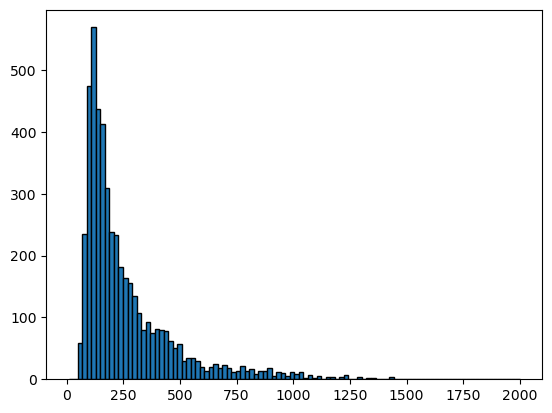

In [151]:
plt.hist(df2['Number_Words'], edgecolor='black', range=[10, 2000], bins=100)

In [ ]:
# saving to CSV - better save after we clean!
#df2.to_csv('FinalDataHW6.csv', index=False)

# Cleaning the text column

In [94]:
import re
# Chashi code
def clean_report(report):
    report = re.sub(r'\[[^]]*\]', '', report)  # remove any text within square brackets
    report = re.sub(r'\n\s*\n', '\n', report)  # remove any blank lines
    report = re.sub(r'^\s+', '', report, flags=re.MULTILINE)  # remove any leading spaces at the beginning of each line
    
    #report = re.sub(r'^[^:]*:', '', report, flags=re.MULTILINE)  # remove any text before a colon
    #report = re.sub(r'\n', '. ', report)  # add a period at the end of each line --> RENATA did not like that for the doctor note!
    # remove time stamp
    report = re.sub(r'\d{1,2}:\d{2}\s(AM|PM)\.\s', '', report)
    # remove underscores
    report = report.replace('_', '')
    # remove extra white spaces
    report = re.sub(r'\s+', ' ', report.strip())
    # remove double punctuations
    report = re.sub(r'(?<=[^\w\s])\s?[^\w\s]|[^\w\s]\s?(?=[^\w\s])', '', report)
    return report.strip()  # remove any trailing spaces at the end of the report


In [105]:
print(clean_report(df.loc[54217, 'text']))

10:57 AM CT HEAD W/O CONTRAST-77 BY DIFFERENT PHYSICIAN # Reason: 47 year old woman s/p cerebral angio and coiling, EVD in pla Admitting Diagnosis: SUBARACHNOID HEMORRHAGE MEDICAL CONDITION: 47 year old woman s/p cerebral angio and coiling, EVD in place, please evaluate position. REASON FOR THIS EXAMINATION: 47 year old woman s/p cerebral angio and coiling, EVD in place, please evaluate position. No contraindications for IV contrast PROVISIONAL FINDINGS IMPRESSION (PFI AJy WED 4:41 PM Status post right frontal ventriculostomy shunt placement with tip terminating in the region of the foramen of in the right lateral ventricle. Ventricular size is unchanged. Re-demonstration of subarachnoid hemorrhage with no evidence for new hemorrhage. FINAL REPORT HISTORY: 47-year-old female with subarachnoid hemorrhage and left MCA aneurysm, status post ETT placement. COMPARISON: CTs of the head dated , and . NON-CONTRAST HEAD CT: There has been interval placement of a right frontal approach ventricul

In [41]:
print(clean_report(report))

CCU NSG ADMIT NOTE-NSICU BORDER 69 YO TRANSFERED FROM MEDICAL CENTER  VT ON TO W ALTERED MENTAL STATUS, ELEVATED ICP& NEW SAH-POSTERIOR FOSSA PMH:SEVER TIC DOULOUREUX W TRIGEMINAL NERVE DECOMPRESSION ON  HTN OSTEOPOROSIS HX DIVERTICULITUS HYPERLIPIDEMIA DM CHRONIC PAIN SYNDROME ALLERGIES:PCN MSO4 MEDS:SEE MD ADMIT NOTE SOCIAL:LIVES IN VT W FAMILY NEAR BY. FAMILY ON WAY TO HOSPITAL PRESENT HX:DCED FROM ON SP TRIGEMINAL NERVE DECOMPRESSION. DEVELOPED NECK PAIN SINCE DC W INCREASED SEVERITY ON -PRESENTED TO OUTSIDE HOSPITAL-WORKUPED W LP-ELEVATED ICP & 1 GRAM POS COCCI TUBE CONTAMINANT& CT SCAN-SAH. TRANSFERED TO FOR FURTHER MANAGEMENT. IN EW-REPEAT CT SCAN-SAH-POTERIOR FOSSA W OBSTRUCTIVE HYDROCEPHALUS. VENTRICULAR DRAIN PLACED & ADMITTED TO CCU (NO NSICU BEDS O:NEURO=SOMULENT, BUT AROUSABLE. VERY SOFT SPOKEN. WO CO PAIN @ PRESENT. MOVES ALL EXTREM W ?L-SIDE SLIGHTLY WEAKER. POSITIVE SENSATION THROUGHOUT. TONGUE MIDLINE. ORIENTED X1-THOUGHT SHE WAS ON THE WAY TO THE HOSPITAL, UNSURE OF Y

In [44]:
report_clean = clean_report(report)

In [48]:
type(report_clean)

str

In [47]:
print(len(str(report_clean).split()))

253


In [49]:
print(len(str(report).split()))

279


In [107]:
import transformers
import torch

# Load the T5 model
model = transformers.T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = transformers.T5Tokenizer.from_pretrained('t5-base', model_max_length=1024)

# Define the input data
input_text = report_clean

# Tokenize the input data
input_ids = tokenizer.encode("summarize: " +input_text, return_tensors='pt')

# Generate the summary
summary_ids = model.generate(input_ids, num_beams=4, max_length=100, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the summary
print("Summary:", summary)


Summary: CCU NSG ADMIT NOTE-NSICU BORDER 69 YO TRANSFERED FROM MEDICAL CENTER VT ON TO W ALTERED MENTAL STATUS, ELEVATED ICP& NEW SAH-POSTERIOR FOSSA. VENTRICULAR DRAIN PLACED & ADMITTED TO CCU (NO NSICU BEDS O:SOMULENT, BUT AROUS


In [114]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base")

def sumamrizer(text):
  # Generate summary
  summary = summarizer(text, min_length=30, do_sample=False)

  # Print the summary
  #print(summary[0]['summary_text'])
  return summary[0]['summary_text']

In [115]:
print(sumamrizer(input_text2))

Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors


47-year-old female with subarachnoid hemorrhage and left MCA aneurysm . ventricular size has not substantially changed compared to prior examination .


In [152]:
# Define the input data
input_text2 = clean_report(df.loc[54217, 'text'])

# Tokenize the input data
input_ids = tokenizer.encode("summarize: " +input_text2, return_tensors='pt')

# Generate the summary
summary_ids = model.generate(input_ids, num_beams=4, max_length=300, early_stopping=False)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the summary
print("Summary:", summary)

Summary: 47 year old female with subarachnoid hemorrhage and left MCA aneurysm. re-demonstrated is diffuse subarachnoid hemorrhage with no evidence for new hemorrhage. mild sulcal effacement likely reflects cerebral edema.


In [145]:
# Define the input data
input_text2 = clean_report(df.loc[54217, 'text'])

# Tokenize the input data
input_ids = tokenizer.encode("summarize: " +input_text2, return_tensors='pt')

# Generate the summary
summary_ids = model.generate(input_ids, num_beams=64, max_length=400, early_stopping=False)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print the summary
print("Summary:", summary)

Summary: 47 year old female with subarachnoid hemorrhage and left MCA aneurysm. re-demonstrated is diffuse subarachnoid hemorrhage with no evidence for new hemorrhage. mild sulcal effacement likely reflects cerebral edema.


# Understanding the parameters
### For the model,generate() part:
max_legth = how long the summary can be (but it has not changed for me, see early_Stopping)
num_beams = how many summaries options are generated?
______
input_ids: This is the input sequence of tokens that the model should generate from. It is typically a tensor of shape (batch_size, sequence_length).

max_length: This is the maximum length of the generated sequence, in terms of number of tokens. If the generated sequence exceeds this length, it will be truncated.

num_beams: This parameter controls how many "beams" the model should use when generating the sequence. Each beam corresponds to a different sequence of tokens that the model is considering at any given time. A higher number of beams can help the model to explore a wider range of possible sequences, but it also increases the computational cost.

length_penalty: This parameter controls how much to penalize longer sequences when selecting the final output. A higher length penalty will tend to favor shorter sequences, while a lower length penalty will tend to favor longer sequences.

temperature: This parameter controls the "temperature" of the softmax distribution used to sample the next token in the sequence. A higher temperature will tend to produce more diverse and unpredictable sequences, while a lower temperature will tend to produce more predictable and repetitive sequences.

repetition_penalty: This parameter controls how much to penalize repeating the same token in the sequence. A higher repetition penalty will tend to favor sequences with less repetition, while a lower repetition penalty will tend to favor sequences with more repetition.

early_stopping: This parameter controls whether the model should stop generating the sequence as soon as it reaches an EOS (end-of-sequence) token. If early_stopping is set to True, the model will stop generating the sequence as soon as it encounters an EOS token.

# For the toekinzer.decode() part (making it human readable again):
skip_special_tokens=True

summary_ids: The summary output from the generate() method of the model. This is a sequence of token IDs representing the generated summary.

skip_special_tokens=True: This parameter tells the tokenizer to skip any special tokens, such as [CLS] and [SEP], that were added to the input sequence by the tokenizer. Since these tokens are not part of the original input text, we want to exclude them from the final summary.

clean_up_tokenization_spaces=True: This parameter tells the tokenizer to clean up any extra spaces or whitespace characters that may have been added during tokenization. This ensures that the final summary is a clean, readable text without any unnecessary whitespace.


____
To use another Clinical model that was fina tuned on T5 we can use the t5-base tokenizer from hugging face. But I was not able to get any of them. I thnik it depends if the model has it's own tokenizer or not as well.  

Maybe fine tune ourselves?


# Ok, I liked mine and not the pipeline better. But I need to worry about the size. So either we get what is smaller or I think we should split the columns in more!